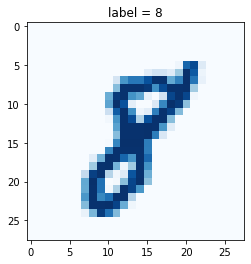

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

mnist_dataset = MnistDataset('MNIST/mnist_train.csv')
mnist_dataset.plot_image(17)

In [2]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )
        self.loss_function = nn.MSELoss()
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        self.counter = 0
        self.progress = []
        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    pass

In [3]:
def generate_random(size):
    random_data = torch.rand(size)
    return(random_data)

D = Discriminator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(generate_random(784), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000


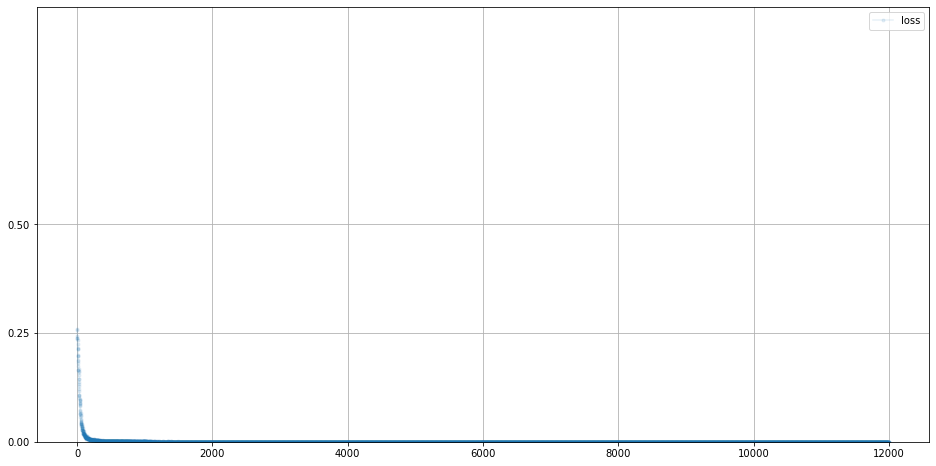

In [4]:
D.plot_progress()

In [5]:
for i in range(4):
    image_data_tensor = mnist_dataset[random.randint(0, 60000)][1]
    print(D.forward(image_data_tensor).item())
    pass

for i in range(4):
    print(D.forward(generate_random(784)).item())
    pass

0.9961115717887878
0.9964861869812012
0.9972901344299316
0.9968445301055908
0.00556593295186758
0.005049216561019421
0.004876879975199699
0.004948549438267946


In [6]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 200),
            nn.Sigmoid(),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )
        self.optimiser = torch.optim.SGD(self.parameters(), lr = 0.01)
        self.counter = 0
        self.progress = []
        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns = ['loss'])
        df.plot(ylim = (0, 1.0), figsize = (16, 8), alpha = 0.1, marker = '.', grid = True, yticks = (0, 0.25, 0.5))
        pass
    pass

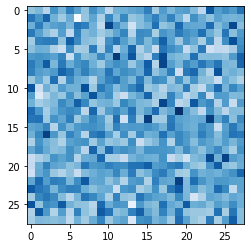

In [7]:
G = Generator()
output = G.forward(generate_random(1))
img = output.detach().numpy().reshape(28, 28)
plt.imshow(img, interpolation = 'none', cmap = 'Blues')

In [8]:
%%time

D = Discriminator()
G = Generator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(G.forward(generate_random(1)).detach(), torch.FloatTensor([0.0]))
    G.train(D, generate_random(1), torch.FloatTensor([1.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
CPU times: total: 12min 17s
Wall time: 1min 32s


In [9]:
# %%time

# torch.cuda.get_device_name()
# device = torch.device("cuda")

# D = Discriminator()
# D = D.to(device)
# G = Generator()
# G = G.to(device)

# label, image_data_tensor, target_tensor = mnist_dataset[:]

# image_data_tensor_g = image_data_tensor.to(device)
# # target_tensor_g = target_tensor.to(device)

# tFT1 = torch.FloatTensor([1.0]).to(device)
# tFT0 = torch.FloatTensor([0.0]).to(device)

# Dt = generate_random(len(mnist_dataset)).to(device)
# Gt = generate_random(len(mnist_dataset)).to(device)
# Dt = Dt.reshape(len(Dt),1)
# Gt = Dt.reshape(len(Gt),1)

# for image_data_tensor, dt, gt in zip(image_data_tensor_g, Dt, Gt):
#     D.train(image_data_tensor, tFT1)
#     D.train(G.forward(dt).detach(), tFT0)
#     G.train(D, gt, tFT1)
#     pass

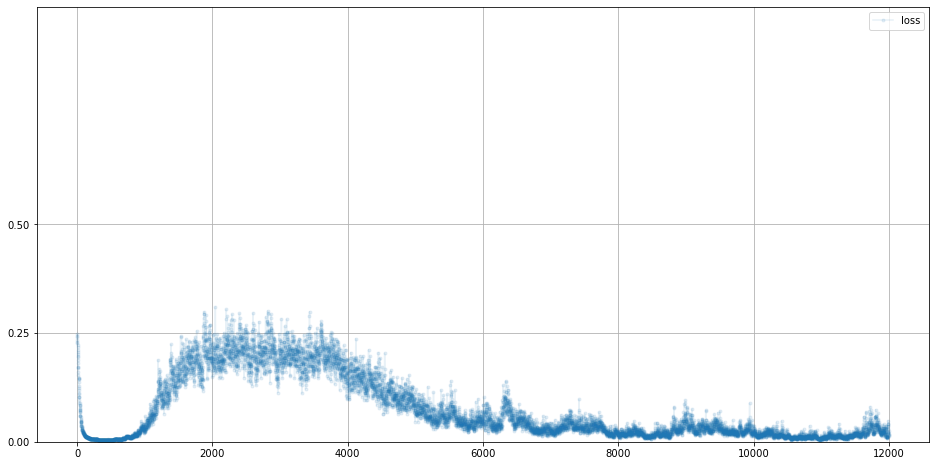

In [10]:
D.plot_progress()

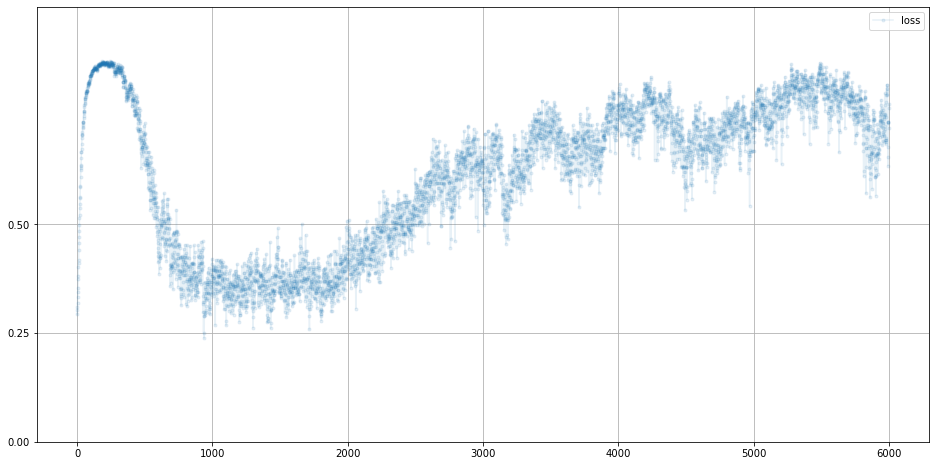

In [11]:
G.plot_progress()

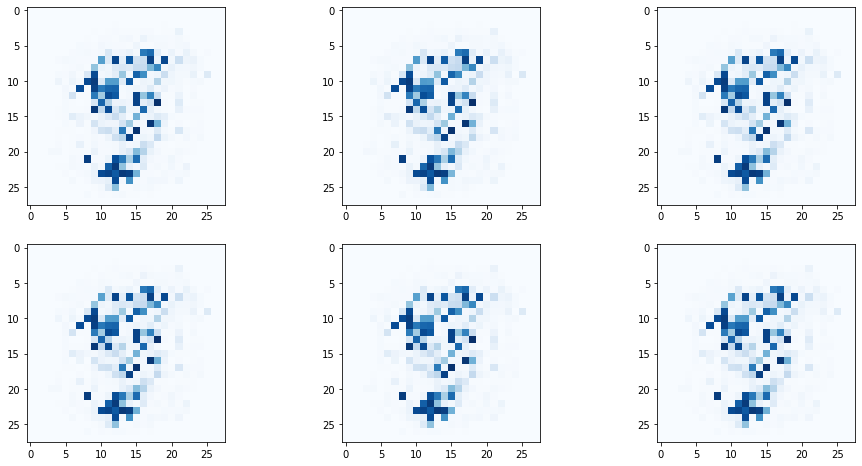

In [12]:
f, axarr = plt.subplots(2, 3, figsize = (16, 8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random(1))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i, j].imshow(img, interpolation = 'none', cmap = 'Blues')
        pass
    pass

In [13]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02), #nn.Sigmoid(),
            nn.LayerNorm(200),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )
        self.loss_function = nn.BCELoss() #nn.MSELoss()
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001) #torch.optim.SGD(self.parameters(), lr=0.01)
        self.counter = 0
        self.progress = []
        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    pass

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 200),
            nn.LeakyReLU(0.02), #nn.Sigmoid(),
            nn.LayerNorm(200),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001) #torch.optim.SGD(self.parameters(), lr = 0.01)
        self.counter = 0
        self.progress = []
        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns = ['loss'])
        df.plot(ylim = (0, 1.0), figsize = (16, 8), alpha = 0.1, marker = '.', grid = True, yticks = (0, 0.25, 0.5))
        pass
    pass

D = Discriminator()
G = Generator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(G.forward(generate_random(1)).detach(), torch.FloatTensor([0.0]))
    G.train(D, generate_random(1), torch.FloatTensor([1.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000


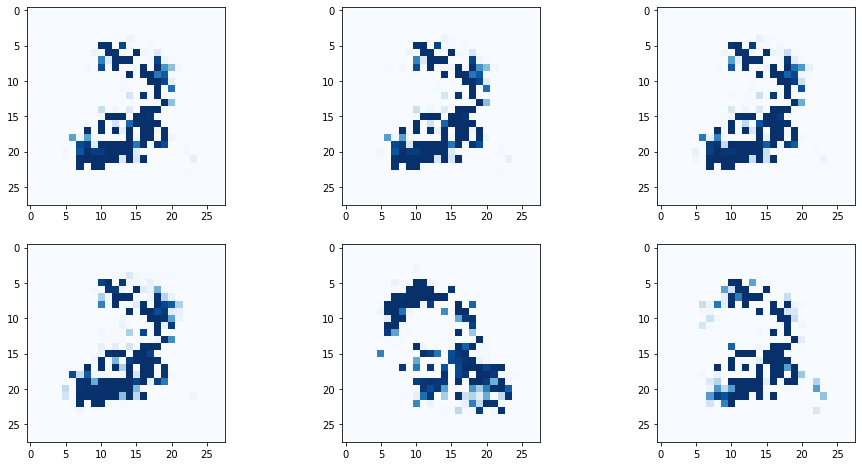

In [14]:
f, axarr = plt.subplots(2, 3, figsize = (16, 8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random(1))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i, j].imshow(img, interpolation = 'none', cmap = 'Blues')
        pass
    pass

In [15]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02), #nn.Sigmoid(),
            nn.LayerNorm(200),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )
        self.loss_function = nn.BCELoss() #nn.MSELoss()
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001) #torch.optim.SGD(self.parameters(), lr=0.01)
        self.counter = 0
        self.progress = []
        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns = ['loss'])
        df.plot(ylim = (0), figsize = (16, 8), alpha = 0.1, marker = '.', grid = True, yticks = (0, 0.25, 0.5, 1.0, 5.0))
        pass
    pass

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 200),
            nn.LeakyReLU(0.02), #nn.Sigmoid(),
            nn.LayerNorm(200),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001) #torch.optim.SGD(self.parameters(), lr = 0.01)
        self.counter = 0
        self.progress = []
        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns = ['loss'])
        df.plot(ylim = (0), figsize = (16, 8), alpha = 0.1, marker = '.', grid = True, yticks = (0, 0.25, 0.5, 1.0, 5.0))
        pass
    pass

D = Discriminator()
G = Generator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(G.forward(generate_random(100)).detach(), torch.FloatTensor([0.0]))
    G.train(D, generate_random(100), torch.FloatTensor([1.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000


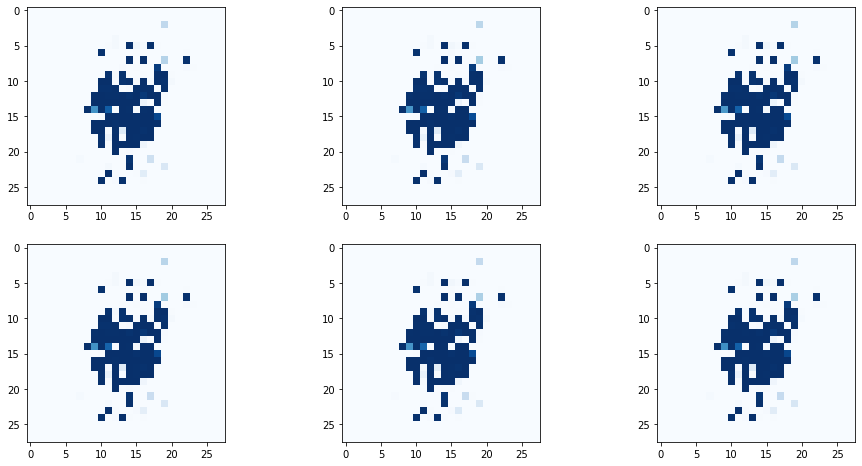

In [16]:
f, axarr = plt.subplots(2, 3, figsize = (16, 8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random(100))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i, j].imshow(img, interpolation = 'none', cmap = 'Blues')
        pass
    pass

In [17]:
def generate_random_image(size):
    random_data = torch.rand(size)
    return(random_data)

def generate_random_seed(size):
    random_data = torch.randn(size)
    return(random_data)

In [18]:
D = Discriminator()
G = Generator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(G.forward(generate_random_seed(100)).detach(), torch.FloatTensor([0.0]))
    G.train(D, generate_random_seed(100), torch.FloatTensor([1.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000


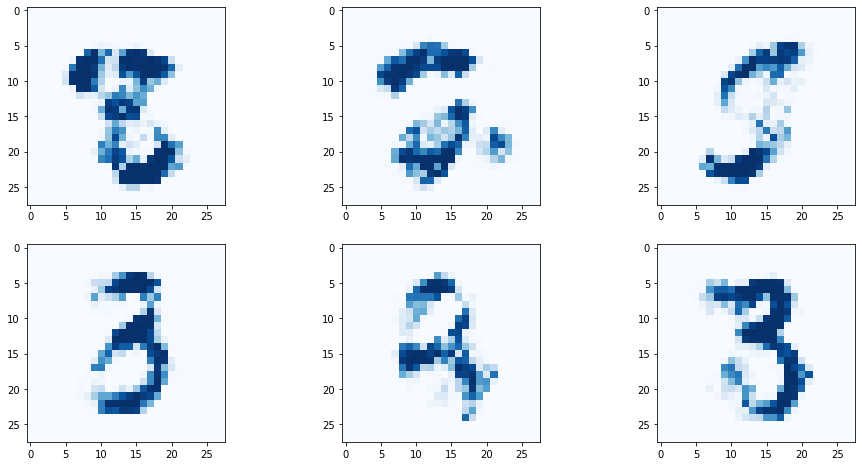

In [19]:
f, axarr = plt.subplots(2, 3, figsize = (16, 8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i, j].imshow(img, interpolation = 'none', cmap = 'Blues')
        pass
    pass

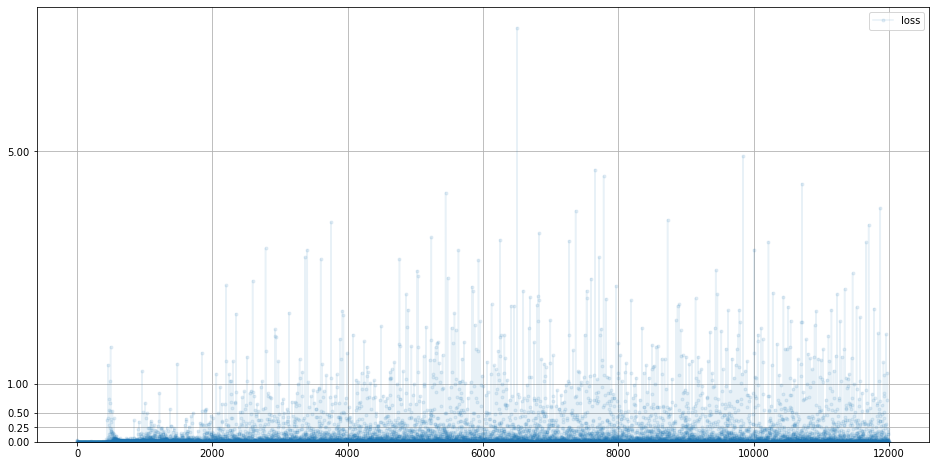

In [20]:
D.plot_progress()

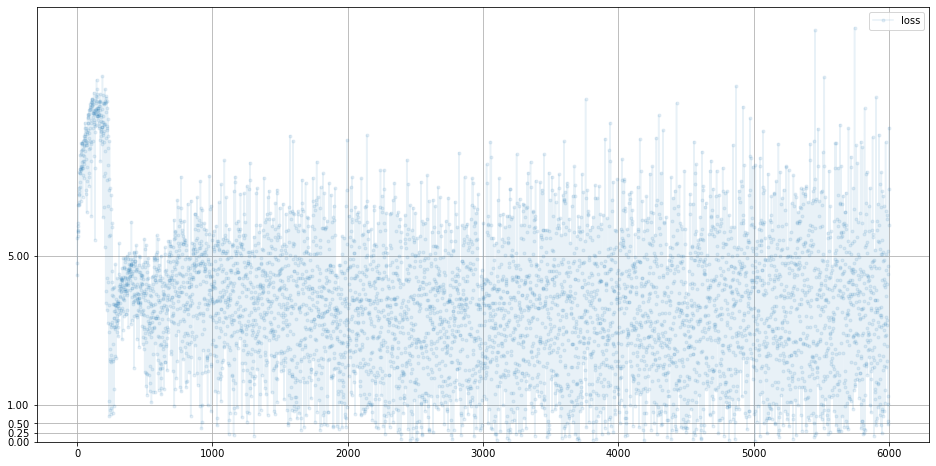

In [21]:
G.plot_progress()

In [22]:
%%time

D = Discriminator()
G = Generator()

for ep in range(10):
    for label, image_data_tensor, target_tensor in mnist_dataset:
        D.train(image_data_tensor, torch.FloatTensor([1.0]))
        D.train(G.forward(generate_random_seed(100)).detach(), torch.FloatTensor([0.0]))
        G.train(D, generate_random_seed(100), torch.FloatTensor([1.0]))
        pass
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
counter =  430000
counter =  440000
counter =  450000
counter =  460000
counter =  470000
counter =  480000
counter =  490000
counter =  500000
counter =  510000
counter =  520000
counter =  530000
counter =  540000
counter =  550000
counter =  560000
c

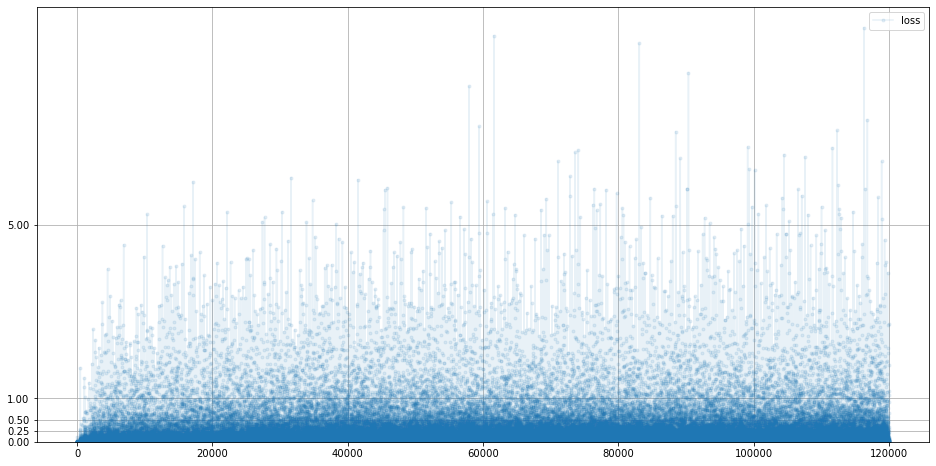

In [23]:
D.plot_progress()

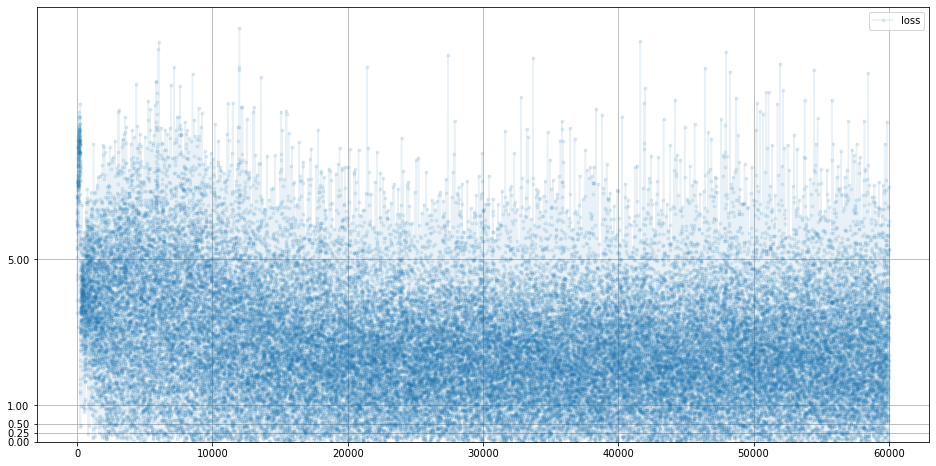

In [24]:
G.plot_progress()

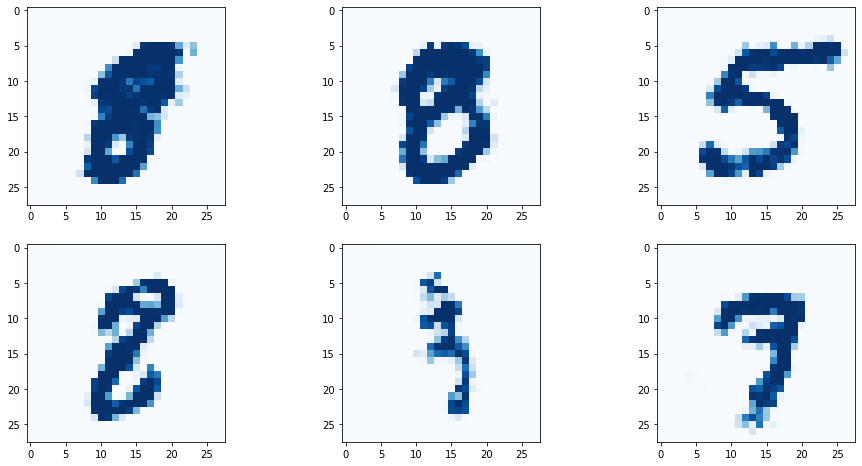

In [25]:
f, axarr = plt.subplots(2, 3, figsize = (16, 8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i, j].imshow(img, interpolation = 'none', cmap = 'Blues')
        pass
    pass

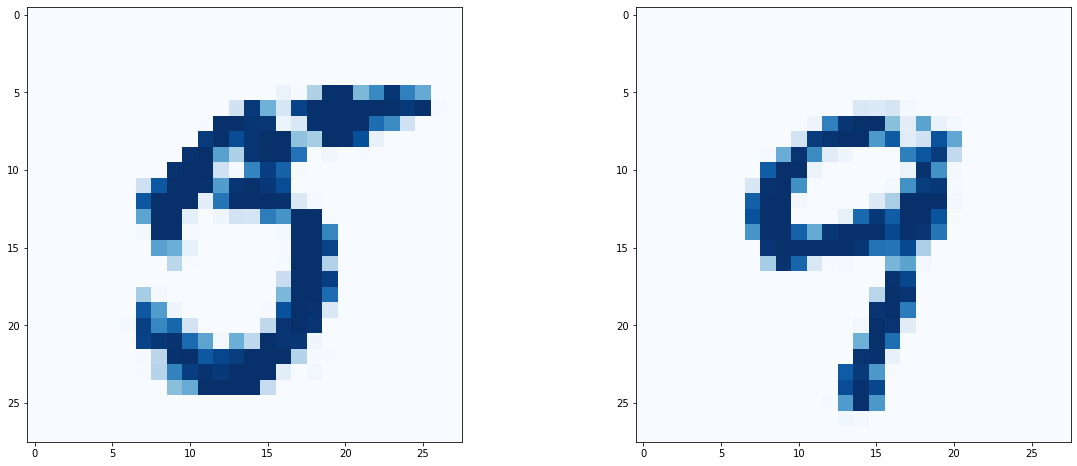

In [26]:
def genIMG(Generator, seed):
    out = Generator.forward(seed)
    img = out.detach().numpy().reshape(28, 28)
    plt.imshow(img, interpolation = 'none', cmap = 'Blues')
    return img

seed1 = generate_random_seed(100)
seed2 = generate_random_seed(100)

plt.figure(figsize = (20, 8))
plt.subplot(1,2,1)
img1 = genIMG(G, seed1)
plt.subplot(1,2,2)
img2 = genIMG(G, seed2)

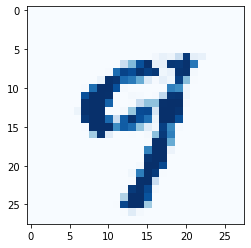

In [27]:
img2 = genIMG(G, seed1 + seed2)

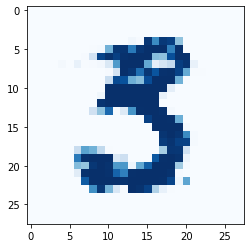

In [28]:
img2 = genIMG(G, seed1 - seed2)

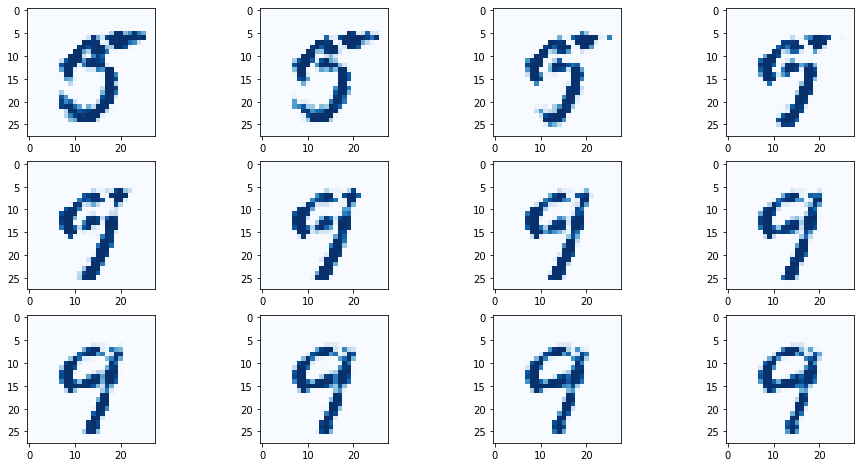

In [29]:
def genIMG(Generator, seed):
    out = Generator.forward(seed)
    img = out.detach().numpy().reshape(28, 28)
    return img

count = 0

f, axarr = plt.subplots(3, 4, figsize = (16, 8))
for i in range(3):
    for j in range(4):
        seed = seed1 + (seed2 - seed1) / 11 * count
        img = genIMG(G, seed)
        axarr[i, j].imshow(img, interpolation = 'none', cmap = 'Blues')
        count = count + 1
        pass
    pass